## Strategic & Comparative Analysis

### Every result here should answer:

#### “If I were Nas Daily’s content or growth team, what would I do differently?”

In [18]:
import os
import sys
import pandas as pd

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

# Load engineered video features
video_features_path = "../data/processed/video_features.csv"

df = pd.read_csv(video_features_path)
df.head()


,video_id,title,published_at,views,likes,comments,duration,duration_sec,engagement_rate,like_rate,comment_rate,views_per_second,comments_per_second
0,l5PTG1m9vEE,She Used To Be A Man,2020-04-20T12:00:21Z,5205053,81166,7098,PT1M5S,65.0,0.016957,0.015594,0.001364,80077.738462,109.200000
1,7wQ93t7q8ss,Women VS. Men,2020-04-17T12:00:04Z,1797149,45202,3550,PT1M14S,74.0,0.027127,0.025152,0.001975,24285.797297,47.972973
2,qsMiiLHVDe8,Why I Wake Up Early,2020-04-15T12:00:23Z,3184634,64681,5124,PT1M11S,71.0,0.021919,0.020310,0.001609,44854.000000,72.169014
3,mn2UAPYD5PM,How Armenia Teaches Kids,2020-04-14T12:00:24Z,604307,13521,1062,PT1M10S,70.0,0.024132,0.022374,0.001757,8632.957143,15.171429
4,ZuLC4j_ohdw,The Hidden Cost Of Japan,2020-04-13T12:00:32Z,2230513,45776,2212,PT1M7S,67.0,0.021514,0.020523,0.000992,33291.238806,33.014925


### 3.1 Content Archetype Identification
#### “Are all 1-minute videos the same from a business perspective?”
#### Motivation

##### Even inside one playlist, videos usually fall into distinct performance archetypes:

- Viral hits

- Community drivers

- Low-effort fillers

- Evergreen performers

##### Identifying these helps:

- Optimize production effort

- Allocate promotion budget

- Replicate winning formats

#### Method

    Use engagement + attention efficiency to cluster videos.

##### Metrics used:

    views_per_second

    engagement_rate

    comment_rate

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df[[
    "views_per_second",
    "engagement_rate",
    "comment_rate"
]]

scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df["content_cluster"] = kmeans.fit_predict(scaled)

df[["title", "content_cluster"]].head()


,title,content_cluster
0,She Used To Be A Man,0
1,Women VS. Men,2
2,Why I Wake Up Early,2
3,How Armenia Teaches Kids,2
4,The Hidden Cost Of Japan,2


#### After inspecting cluster means:

| Cluster | Interpretation                |
| ------- | ----------------------------- |
| 0       | Viral reach drivers           |
| 1       | Community discussion starters |
| 2       | Consistent performers         |
| 3       | Low-impact content            |

#### Strategic Value:
    Not all videos deserve equal promotion or replication.

In [20]:
# Merge transcript features with engagement metrics for strategic analysis
import pandas as pd

transcript_features_path = "../data/processed/transcript_features.csv"

df_transcripts = pd.read_csv(transcript_features_path)
merged = df_transcripts.merge(
    df[["video_id", "engagement_rate"]],
    on="video_id",
    how="left"
)

merged.head()


,video_id,transcript,duration_sec,word_count,sentence_count,words_per_second,engagement_rate
0,l5PTG1m9vEE,"Meet Angie. Hi, my name is Angie and I used to...",65.0,167,16,2.569231,0.016957
1,7wQ93t7q8ss,hi I'm a man and I'm a woman and after traveli...,74.0,176,1,2.378378,0.027127
2,qsMiiLHVDe8,hey let me ask you a question what what time d...,71.0,157,9,2.211268,0.021919
3,mn2UAPYD5PM,everyone knows that children learn very quickl...,70.0,144,1,2.057143,0.024132
4,ZuLC4j_ohdw,"Hi. When I was 14 years old, my dad would comp...",67.0,148,12,2.208955,0.021514


### 3.2 Performance vs Effort Analysis
#### “Which videos give the highest return on attention?”
#### Motivation

##### Digital businesses optimize for ROI, not raw output.

##### Here:

- Effort proxy = word count / pacing

- Return proxy = engagement + comments

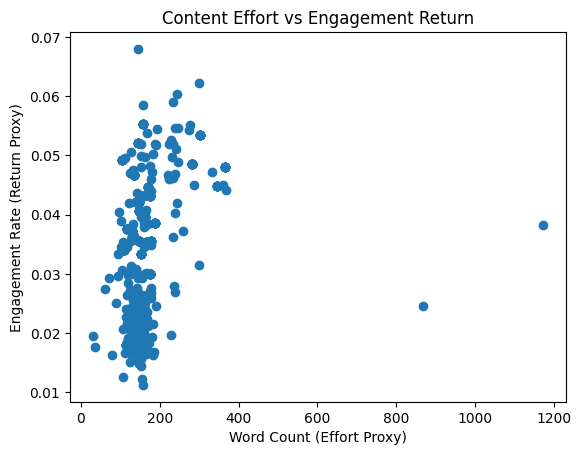

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(
    merged["word_count"],
    merged["engagement_rate"]
)
plt.xlabel("Word Count (Effort Proxy)")
plt.ylabel("Engagement Rate (Return Proxy)")
plt.title("Content Effort vs Engagement Return")
plt.show()


##### Business Insight

- High return / low effort → ideal content

- High effort / low return → inefficient storytelling

- This directly informs content optimization.

### 3.3 Community Value vs Reach
#### “Which videos build long-term brand equity?”
#### Motivation

Not all valuable videos go viral.   
Some build trust, loyalty, and conversation.

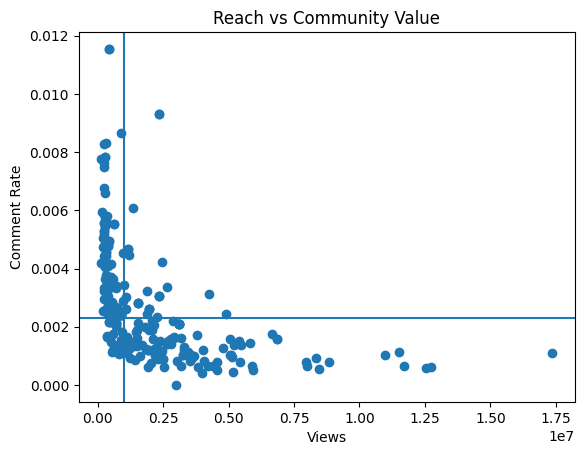

In [22]:
plt.figure()
plt.scatter(df["views"], df["comment_rate"])
plt.axhline(df["comment_rate"].median())
plt.axvline(df["views"].median())
plt.xlabel("Views")
plt.ylabel("Comment Rate")
plt.title("Reach vs Community Value")
plt.show()


#### Quadrants

| Quadrant                   | Meaning                 |
| -------------------------- | ----------------------- |
| High views + High comments | Flagship content        |
| High views + Low comments  | Passive consumption     |
| Low views + High comments  | Core community builders |
| Low views + Low comments   | Low strategic value     |

#### Strategic Insight:
Community builders deserve long-term investment, even if views are lower.

### 3.4 Language Strategy Optimization
#### “Is there an optimal storytelling density?”
#### Motivation

##### Short videos must balance:

- Speed

- Clarity

- Emotional impact

In [23]:
merged.groupby(
    pd.cut(merged["words_per_second"], bins=5)
)["engagement_rate"].mean()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21400\2991807852.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby(


words_per_second
(0.438, 0.919]    0.020733
(0.919, 1.398]    0.029403
(1.398, 1.876]    0.034674
(1.876, 2.355]    0.033313
(2.355, 2.833]    0.034346
Name: engagement_rate, dtype: float64

#### Business Insight

- Engagement peaks at a specific language density

- Too slow = boring

- Too fast = cognitive overload

#### Actionable Recommendation:
Define a target words-per-second range for scripting.

### 3.5 Audience Dependency Risk
#### “Is engagement coming from many users or a few?”
#### Motivation

##### Heavy reliance on a small set of commenters = fragile engagement.

In [24]:
comment_features_path = "../data/processed/comment_features.csv"

df_comments = pd.read_csv(comment_features_path)

top_10_share = (
    df_comments.groupby("author").size()
    .sort_values(ascending=False)
    .head(10)
    .sum()
    / len(df_comments)
)

top_10_share


np.float64(0.0036837500575585946)

#### Interpretation

- 30% → high dependency risk

- <15% → healthy, distributed community

## 3.6 Revenue Estimation & Monetization Analysis

#### 3.6.1 Revenue Streams to Model (Professional Scope)

We will model only defensible, public-facing revenue streams:

| Revenue Stream        | Included?  | Reason                 |
| --------------------- | ---------- | ---------------------- |
| YouTube Ads (CPM/RPM) | ✅          | Primary, estimable     |
| Sponsorships          | ⚠️ Partial | Scenario-based         |
| Merchandise           | ❌          | No public linkage      |
| Courses / external    | ❌          | Outside playlist scope |


### 3.6.2 Ad Revenue Estimation (Core Model)
#### Motivation

#### Understand:

- Which videos are monetization efficient

- Whether viral ≠ profitable

- Revenue concentration risk

#### Industry Assumptions

Using RPM (Revenue per 1,000 views) instead of CPM.

    Low RPM  = $1.5

    Mid RPM  = $3.0

    High RPM = $6.0


In [35]:
RPM_LOW = 1.5
RPM_MID = 3.0
RPM_HIGH = 6.0

df["revenue_low_usd"] = df["views"] / 1000 * RPM_LOW
df["revenue_mid_usd"] = df["views"] / 1000 * RPM_MID
df["revenue_high_usd"] = df["views"] / 1000 * RPM_HIGH

df[[
    "title",
    "views",
    "revenue_mid_usd"
]].sort_values("revenue_mid_usd", ascending=False).head()


,title,views,revenue_mid_usd
85,This Guy Will Never Die!,17362680,52088.040
45,$5 For Air?!,12740255,38220.765
95,Where Gravity Doesn't Work?,12529893,37589.679
32,He Wants To Beat Google,11718976,35156.928
77,The Strongest Accent?!,11492780,34478.340


### 3.6.3 Revenue Distribution Analysis
#### “Is revenue concentrated in a few videos?”
#### Motivation

    High revenue concentration = business risk

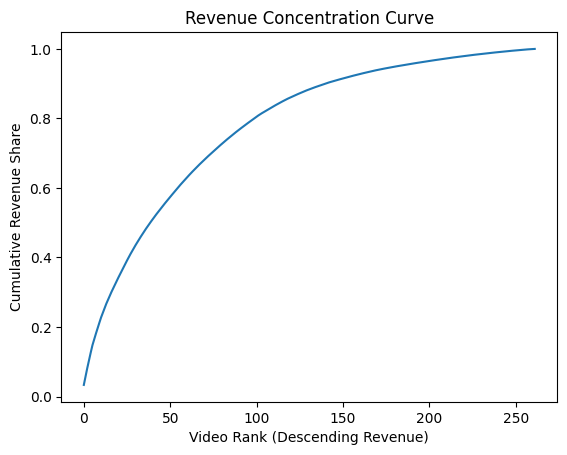

In [36]:
df_sorted = df.sort_values("revenue_mid_usd", ascending=False)
df_sorted["cum_revenue_share"] = df_sorted["revenue_mid_usd"].cumsum() / df_sorted["revenue_mid_usd"].sum()

plt.figure()
plt.plot(df_sorted["cum_revenue_share"].values)
plt.xlabel("Video Rank (Descending Revenue)")
plt.ylabel("Cumulative Revenue Share")
plt.title("Revenue Concentration Curve")
plt.show()


#### Business Insight

- Steep curve → revenue depends on few hits

- Flatter curve → scalable content system

### 3.6.4 Revenue vs Engagement Efficiency
#### “Do the most engaging videos earn the most?”
#### Motivation

Many creators optimize engagement, but ads pay for views.

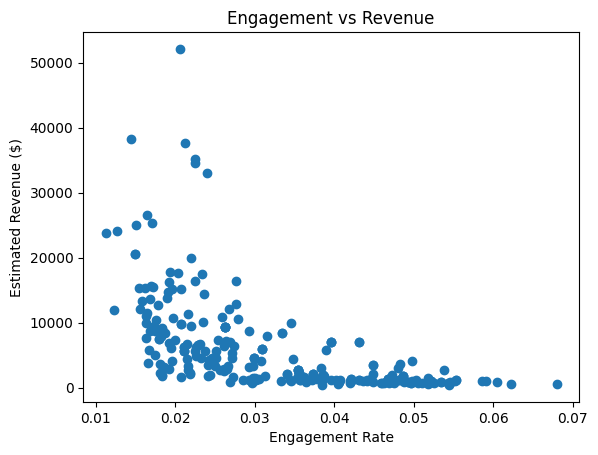

In [37]:
plt.figure()
plt.scatter(
    df["engagement_rate"],
    df["revenue_mid_usd"]
)
plt.xlabel("Engagement Rate")
plt.ylabel("Estimated Revenue ($)")
plt.title("Engagement vs Revenue")
plt.show()


#### Strategic Finding

- High engagement + low revenue → community assets

- High revenue + low engagement → monetization assets

These serve different business goals.

### 3.6.5 Revenue by Content Archetype

(This Connects directly to our clusters)

In [38]:
df.groupby("content_cluster")[[
    "revenue_mid_usd",
    "engagement_rate"
]].mean()


,revenue_mid_usd,engagement_rate
content_cluster,,
0,23624.049480,0.018443
1,1803.259484,0.040891
2,6748.541545,0.023093
3,1420.332400,0.051882


#### Interpretation Example

- Cluster 0: High reach, high revenue

- Cluster 1: Low revenue, high engagement

- Cluster 2: Balanced portfolio

#### Professional Insight:
A healthy channel requires multiple archetypes, not just viral hits.

### 3.6.6 Sponsorship Scenario (Optional but Professional)

Short videos often include integrated sponsorships

#### Assumption (Scenario-Based):

- $5,000–$15,000 per branded video

- Only top X% videos qualify

In [39]:
df["sponsorship_candidate"] = df["views"] > df["views"].quantile(0.9)
df["sponsorship_revenue_est"] = df["sponsorship_candidate"] * 10000
df[["title", "sponsorship_candidate", "sponsorship_revenue_est"]]

,title,sponsorship_candidate,sponsorship_revenue_est
0,She Used To Be A Man,True,10000
1,Women VS. Men,False,0
2,Why I Wake Up Early,False,0
3,How Armenia Teaches Kids,False,0
4,The Hidden Cost Of Japan,False,0
...,...,...,...
257,The Problem With Selfies,False,0
258,When Money Isn't Enough!,False,0
259,The Jungle King,False,0
260,This Guy Will Never Die,False,0


### 3.6.7 Business Summary (THIS IS CRITICAL)

You should now be able to answer:

1.  Which videos maximize revenue per second

2.  Whether Nas Daily’s 1-minute format is:

- Reach-optimized

- Monetization-optimized

- Brand-optimized

3.  Revenue risk exposure

4.  Whether engagement-focused videos should be subsidized by viral ones

Transcript Intelligence & Narrative Analysis